In [2]:
#Importing Libraries
import pandas as pd
import sklearn.datasets
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [3]:
#Import Dataset
train=pd.read_csv('/Users/Asus/Documents/Atmel Studio/Factor_Analysis.csv').fillna(0)

In [5]:
#View DataSet
train.shape
train.head(5)

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,0.0,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,0.0,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,0.0,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,0.0,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,0.0,17


In [6]:
train.columns

Index(['Unnamed: 0', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1',
       'O2', 'O3', 'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')

In [7]:
#Dropping Unnecessary Columns
#Axis = 1 indicates a column , 0 indicates a row

train.drop(['gender','education','age'], axis=1,inplace=True)

In [9]:
train.columns

Index(['Unnamed: 0', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1',
       'O2', 'O3', 'O4', 'O5'],
      dtype='object')

In [10]:
#Remove Unnamed Column
train=train.iloc[0:,1:26]

In [11]:
train.head(6)

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
5,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,3.0,...,3.0,5.0,2.0,2.0,3.0,4.0,3,5.0,6.0,1.0


In [12]:
#Create a Factor Analyzer Variable for Factor Analysis
fa=FactorAnalyzer(n_factors=6,rotation="varimax")

In [13]:
train=train.dropna()

In [14]:
fa.fit(train)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [15]:
#Get the Loading
loadings= fa.loadings_

In [16]:
#Get the EigenValues and EigenVectors
ev,v = fa.get_eigenvalues()

In [18]:
#Do a Plot
xvals=range(1,train.shape[1]+1)

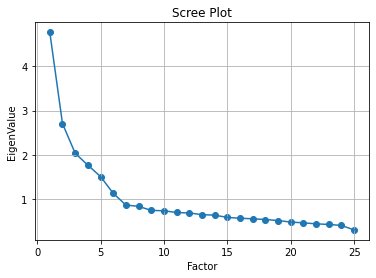

In [20]:
#Plotting a Data
plt.scatter(xvals,ev)
plt.plot(xvals, ev)
plt.title("Scree Plot")
plt.xlabel("Factor")
plt.ylabel("EigenValue")
plt.grid()
plt.show()

In [21]:
pd.DataFrame.from_records(loadings)

,0,1,2,3,4,5
0,0.086191,0.011571,0.042212,-0.506471,0.114752,0.213790
1,0.042205,0.148767,0.132258,0.608157,0.085848,-0.034175
2,-0.013361,0.243642,0.101894,0.591637,0.195817,0.067103
3,-0.090103,0.144058,0.233967,0.380605,0.076586,0.176983
4,-0.147142,0.328657,0.087089,0.463816,0.221450,0.083150
5,-0.008145,0.029528,0.500004,-0.002805,0.188002,-0.086095
6,0.051732,-0.022378,0.630120,0.066893,0.212532,0.068325
7,-0.018493,-0.002594,0.544058,0.122410,0.032116,0.021583
8,0.197492,-0.131283,-0.612676,-0.089812,0.175484,0.313512
9,0.273062,-0.203706,-0.536035,-0.072633,0.090365,0.058503
